In [1]:
import pm4py
import pandas as pd
import sys as os

In [2]:
xes_file = 'file\PrepaidTravelCost.xes\PrepaidTravelCost.xes'
log = pm4py.read_xes(xes_file)
df = pm4py.convert_to_dataframe(log)
df.to_csv('file\PrepaidTravelCost.xes\PrepaidTravelCost.csv')

c:\Users\mikdr\OneDrive - Università Politecnica delle Marche\ProgettoPotena\BigData\.venv\lib\site-packages\pm4py\util\dt_parsing\parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
c:\Users\mikdr\OneDrive - Università Politecnica delle Marche\ProgettoPotena\BigData\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 2099/2099 [00:01<00:00, 1822.72it/s]


In [3]:
df

id  org:resource  \
0                       st_step 73555_0  STAFF MEMBER   
1                       st_step 73554_0  STAFF MEMBER   
2                       st_step 73558_0  STAFF MEMBER   
3                       st_step 73559_0  STAFF MEMBER   
4                       st_step 73557_0  STAFF MEMBER   
...                                 ...           ...   
18241                  st_step 186614_0  STAFF MEMBER   
18242                  st_step 186616_0  STAFF MEMBER   
18243                  st_step 186615_0  STAFF MEMBER   
18244  rp_request for payment 186612_15        SYSTEM   
18245  rp_request for payment 186612_16        SYSTEM   

                                           concept:name  \
0                          Permit SUBMITTED by EMPLOYEE   
1                   Permit FINAL_APPROVED by SUPERVISOR   
2             Request For Payment SUBMITTED by EMPLOYEE   
3      Request For Payment FINAL_APPROVED by SUPERVISOR   
4               Request For Payment REJECTED by MISSING   
...                                                 ...   
18241         Request For Payment SUBMITTED by EMPLOYEE   
18242    Request For Payment APPROVED by ADMINISTRATION   
18243  Request For Payment FINAL_APPROVED by SUPERVISOR   
18244                                   Request Payment   
18245                                   Payment Handled   

                 time:timestamp        org:role                 case:Rfp_id  \
0     2017-01-09 14:48:43+00:00        EMPLOYEE   request for payment 73550   
1     2017-01-09 14:48:55+00:00      SUPERVISOR   request for payment 73550   
2     2017-01-12 11:40:27+00:00        EMPLOYEE   request for payment 73550   
3     2017-01-12 11:41:59+00:00      SUPERVISOR   request for payment 73550   
4     2017-01-12 11:53:07+00:00         MISSING   request for payment 73550   
...                         ...             ...                         ...   
18241 2018-12-30 20:16:15+00:00        EMPLOYEE  request for payment 186612   
18242 2018-12-30 20:16:25+00:00  ADMINISTRATION  request for payment 186612   
18243 2019-01-14 15:09:11+00:00      SUPERVISOR  request for payment 186612   
18244 2019-01-15 07:02:45+00:00       UNDEFINED  request for payment 186612   
18245 2019-01-17 17:31:44+00:00       UNDEFINED  request for payment 186612   

      case:Permit travel permit number   case:Task  case:OrganizationalEntity  \
0                              UNKNOWN  task 71977  organizational unit 65463   
1                              UNKNOWN  task 71977  organizational unit 65463   
2                              UNKNOWN  task 71977  organizational unit 65463   
3                              UNKNOWN  task 71977  organizational unit 65463   
4                              UNKNOWN  task 71977  organizational unit 65463   
...                                ...         ...                        ...   
18241                          UNKNOWN     UNKNOWN  organizational unit 65462   
18242                          UNKNOWN     UNKNOWN  organizational unit 65462   
18243                          UNKNOWN     UNKNOWN  organizational unit 65462   
18244                          UNKNOWN     UNKNOWN  organizational unit 65462   
18245                          UNKNOWN     UNKNOWN  organizational unit 65462   

       case:RequestedAmount  ... case:Permit BudgetNumber  \
0                854.579838  ...              budget 6198   
1                854.579838  ...              budget 6198   
2                854.579838  ...              budget 6198   
3                854.579838  ...              budget 6198   
4                854.579838  ...              budget 6198   
...                     ...  ...                      ...   
18241             96.739075  ...                  UNKNOWN   
18242             96.739075  ...                  UNKNOWN   
18243             96.739075  ...                  UNKNOWN   
18244             96.739075  ...                  UNKNOWN   
18245             96.739075  ...                  

In [3]:

print(df.columns)
#need: case:Rfp_id	(trace_id), concept:name(name activity), time:timestamp(end time of activity), org:role(resource that performed the activity). 
#In event insert column result (success, failed)

Index(['id', 'org:resource', 'concept:name', 'time:timestamp', 'org:role',
       'case:Rfp_id', 'case:Permit travel permit number', 'case:Task',
       'case:OrganizationalEntity', 'case:RequestedAmount', 'case:Activity',
       'case:Permit TaskNumber', 'case:Permit BudgetNumber',
       'case:Permit ProjectNumber', 'case:Project', 'case:concept:name',
       'case:Permit OrganizationalEntity', 'case:Permit RequestedBudget',
       'case:Cost Type', 'case:Permit id', 'case:Permit ActivityNumber',
       'case:RfpNumber'],
      dtype='object')


In [5]:
#ENTITIES: case, event, resource
#RELATIONSHIP: composed (btw case and event), achieve (btw event and resource)

In [3]:
#Make new column for event id
id = df[['concept:name']].drop_duplicates().reset_index(drop=True)
id['event:id'] = id.index
id

concept:name  event:id
0                       Permit SUBMITTED by EMPLOYEE         0
1                Permit FINAL_APPROVED by SUPERVISOR         1
2          Request For Payment SUBMITTED by EMPLOYEE         2
3   Request For Payment FINAL_APPROVED by SUPERVISOR         3
4            Request For Payment REJECTED by MISSING         4
5                         Permit REJECTED by MISSING         5
6                                    Request Payment         6
7                                    Payment Handled         7
8                      Permit APPROVED by SUPERVISOR         8
9                  Permit FINAL_APPROVED by DIRECTOR         9
10      Request For Payment APPROVED by PRE_APPROVER        10
11                   Permit APPROVED by PRE_APPROVER        11
12      Request For Payment REJECTED by PRE_APPROVER        12
13          Request For Payment REJECTED by EMPLOYEE        13
14        Request For Payment APPROVED by SUPERVISOR        14
15    Request For Payment FINAL_APPROVED by DIRECTOR        15
16                   Permit REJECTED by PRE_APPROVER        16
17                       Permit REJECTED by EMPLOYEE        17
18        Request For Payment REJECTED by SUPERVISOR        18
19                     Permit REJECTED by SUPERVISOR        19
20             Request For Payment SAVED by EMPLOYEE        20
21    Request For Payment APPROVED by ADMINISTRATION        21
22      Request For Payment APPROVED by BUDGET OWNER        22
23    Request For Payment REJECTED by ADMINISTRATION        23
24                 Permit APPROVED by ADMINISTRATION        24
25                   Permit APPROVED by BUDGET OWNER        25
26                 Permit REJECTED by ADMINISTRATION        26
27      Request For Payment REJECTED by BUDGET OWNER        27
28                   Permit REJECTED by BUDGET OWNER        28

In [4]:
#Make event File
make_event = df[['case:Rfp_id', 'concept:name', 'time:timestamp', 'org:role']] 
make_event  
#Rename column timestamp
make_event.rename(columns={'time:timestamp':'time:timestamp_end'}, inplace=True) 

C:\Users\mikdr\AppData\Local\Temp\ipykernel_15832\960767573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_event.rename(columns={'time:timestamp':'time:timestamp_end'}, inplace=True)


In [5]:
#Associate event id to concept name
make_event = make_event.merge(id, on='concept:name')
make_event

case:Rfp_id  \
0       request for payment 73550   
1       request for payment 73550   
2       request for payment 73550   
3       request for payment 73550   
4       request for payment 73550   
...                           ...   
18241  request for payment 186612   
18242  request for payment 186612   
18243  request for payment 186612   
18244  request for payment 186612   
18245  request for payment 186612   

                                           concept:name  \
0                          Permit SUBMITTED by EMPLOYEE   
1                   Permit FINAL_APPROVED by SUPERVISOR   
2             Request For Payment SUBMITTED by EMPLOYEE   
3      Request For Payment FINAL_APPROVED by SUPERVISOR   
4               Request For Payment REJECTED by MISSING   
...                                                 ...   
18241         Request For Payment SUBMITTED by EMPLOYEE   
18242    Request For Payment APPROVED by ADMINISTRATION   
18243  Request For Payment FINAL_APPROVED by SUPERVISOR   
18244                                   Request Payment   
18245                                   Payment Handled   

             time:timestamp_end        org:role  event:id  
0     2017-01-09 14:48:43+00:00        EMPLOYEE         0  
1     2017-01-09 14:48:55+00:00      SUPERVISOR         1  
2     2017-01-12 11:40:27+00:00        EMPLOYEE         2  
3     2017-01-12 11:41:59+00:00      SUPERVISOR         3  
4     2017-01-12 11:53:07+00:00         MISSING         4  
...                         ...             ...       ...  
18241 2018-12-30 20:16:15+00:00        EMPLOYEE         2  
18242 2018-12-30 20:16:25+00:00  ADMINISTRATION        21  
18243 2019-01-14 15:09:11+00:00      SUPERVISOR         3  
18244 2019-01-15 07:02:45+00:00       UNDEFINED         6  
18245 2019-01-17 17:31:44+00:00       UNDEFINED         7  

[18246 rows x 5 columns]

In [6]:
#Make file Case
make_case = df[['case:Rfp_id']].drop_duplicates().reset_index(drop=True)
csv_case = make_case.to_csv('file\case.csv')

In [7]:
#Make file Resource
make_resource = df[['org:role']].drop_duplicates().reset_index(drop=True)
csv_resource = make_resource.to_csv(r'file\resource.csv')

In [8]:
#Make column time:timestamp_start. Start time is the end of previous activity
make_event['time:timestamp_start'] = make_event.groupby('case:Rfp_id')['time:timestamp_end'].shift(1)
#Where timestamp_start is NaT, replace with timestamp_end
make_event['time:timestamp_start'] = make_event['time:timestamp_start'].fillna(make_event['time:timestamp_end'])
make_event

case:Rfp_id  \
0       request for payment 73550   
1       request for payment 73550   
2       request for payment 73550   
3       request for payment 73550   
4       request for payment 73550   
...                           ...   
18241  request for payment 186612   
18242  request for payment 186612   
18243  request for payment 186612   
18244  request for payment 186612   
18245  request for payment 186612   

                                           concept:name  \
0                          Permit SUBMITTED by EMPLOYEE   
1                   Permit FINAL_APPROVED by SUPERVISOR   
2             Request For Payment SUBMITTED by EMPLOYEE   
3      Request For Payment FINAL_APPROVED by SUPERVISOR   
4               Request For Payment REJECTED by MISSING   
...                                                 ...   
18241         Request For Payment SUBMITTED by EMPLOYEE   
18242    Request For Payment APPROVED by ADMINISTRATION   
18243  Request For Payment FINAL_APPROVED by SUPERVISOR   
18244                                   Request Payment   
18245                                   Payment Handled   

             time:timestamp_end        org:role  event:id  \
0     2017-01-09 14:48:43+00:00        EMPLOYEE         0   
1     2017-01-09 14:48:55+00:00      SUPERVISOR         1   
2     2017-01-12 11:40:27+00:00        EMPLOYEE         2   
3     2017-01-12 11:41:59+00:00      SUPERVISOR         3   
4     2017-01-12 11:53:07+00:00         MISSING         4   
...                         ...             ...       ...   
18241 2018-12-30 20:16:15+00:00        EMPLOYEE         2   
18242 2018-12-30 20:16:25+00:00  ADMINISTRATION        21   
18243 2019-01-14 15:09:11+00:00      SUPERVISOR         3   
18244 2019-01-15 07:02:45+00:00       UNDEFINED         6   
18245 2019-01-17 17:31:44+00:00       UNDEFINED         7   

           time:timestamp_start  
0     2017-01-09 14:48:43+00:00  
1     2017-01-09 14:48:43+00:00  
2     2017-01-09 14:48:55+00:00  
3     2017-01-12 11:40:27+00:00  
4     2017-01-12 11:41:59+00:00  
...                         ...  
18241 2018-12-30 20:16:15+00:00  
18242 2018-12-30 20:16:15+00:00  
18243 2018-12-30 20:16:25+00:00  
18244 2019-01-14 15:09:11+00:00  
18245 2019-01-15 07:02:45+00:00  

[18246 rows x 6 columns]

In [9]:
csv_event = make_event.to_csv('file\events.csv')

parsing log, completed traces :: 100%|██████████| 2099/2099 [00:00<00:00, 2142.95it/s]


                                     id  org:resource  \
0                       st_step 73555_0  STAFF MEMBER   
1                       st_step 73554_0  STAFF MEMBER   
2                       st_step 73558_0  STAFF MEMBER   
3                       st_step 73559_0  STAFF MEMBER   
4                       st_step 73557_0  STAFF MEMBER   
...                                 ...           ...   
18241                  st_step 186614_0  STAFF MEMBER   
18242                  st_step 186616_0  STAFF MEMBER   
18243                  st_step 186615_0  STAFF MEMBER   
18244  rp_request for payment 186612_15        SYSTEM   
18245  rp_request for payment 186612_16        SYSTEM   

                                           concept:name  \
0                          Permit SUBMITTED by EMPLOYEE   
1                   Permit FINAL_APPROVED by SUPERVISOR   
2             Request For Payment SUBMITTED by EMPLOYEE   
3      Request For Payment FINAL_APPROVED by SUPERVISOR   
4               Requ

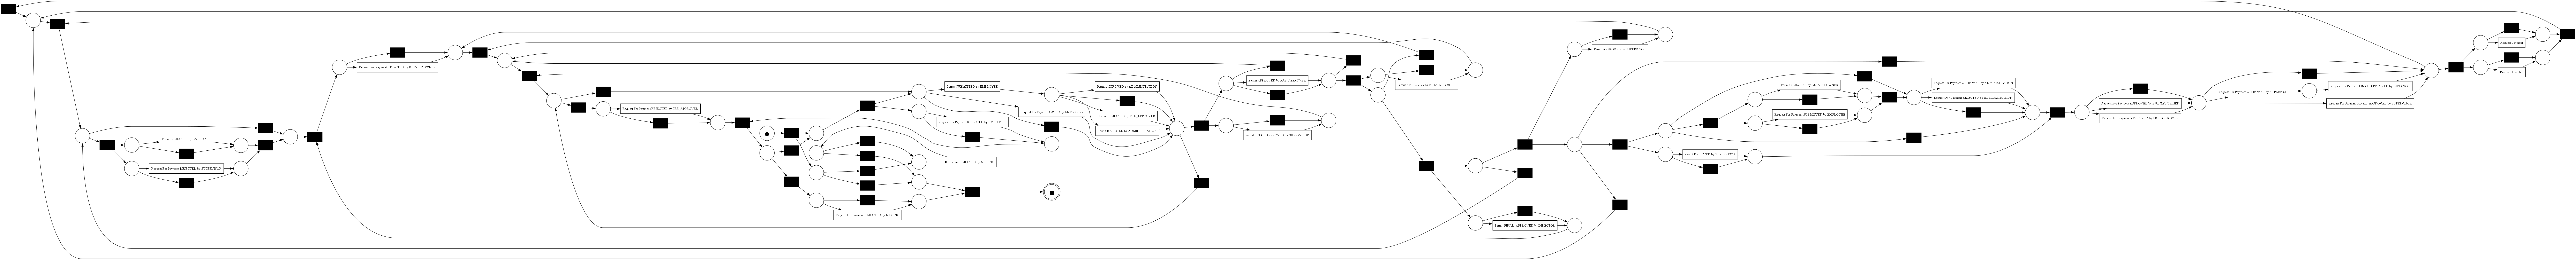

''

In [10]:
#Load the XES file
log = pm4py.read_xes("file/PrepaidTravelCost.xes/PrepaidTravelCost.xes")
print(log)
#Discover Petri net using the inductive miner
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
#Visualize the Petri net
pm4py.view_petri_net(net, initial_marking, final_marking)
pm4py.save_vis_petri_net(net, initial_marking, final_marking, "file\img\petri_net.png")


In [11]:
#Given an event suggest all possible event that can be performed next
from pm4py.algo.filtering.log.start_activities import start_activities_filter

#Possible start of the log
log_start = pm4py.get_start_activities(log)
print(log_start)   
next_activity = {} 
for i in log_start:
    print("Possible start:", i)
    #Filter the log to get the traces that start with the given activity
    filtered_log = start_activities_filter.apply(log, [i])
    #print(len(filtered_log))
    #Avoid duplicates
    next_activity_set = set() 
    #For each trace in the filtered log, get the next activity --> [1] that is the second activity
    for trace in filtered_log: 
        if len(trace) > 1:
            #There we can put also event:id
            next_activity_set.add(trace[1]['concept:name'])
    
    next_activity[i] = list(next_activity_set)

print(next_activity)
#Request For Payment SAVED by EMPLOYEE probabilmente è un evento anomalo che quando starta finisce lì in qel momento

{'Permit SUBMITTED by EMPLOYEE': 1859, 'Request For Payment SUBMITTED by EMPLOYEE': 233, 'Request For Payment SAVED by EMPLOYEE': 7}
Possible start: Permit SUBMITTED by EMPLOYEE
Possible start: Request For Payment SUBMITTED by EMPLOYEE
Possible start: Request For Payment SAVED by EMPLOYEE
{'Permit SUBMITTED by EMPLOYEE': ['Permit APPROVED by SUPERVISOR', 'Permit FINAL_APPROVED by SUPERVISOR', 'Permit REJECTED by PRE_APPROVER', 'Permit APPROVED by ADMINISTRATION', 'Permit REJECTED by SUPERVISOR', 'Permit REJECTED by ADMINISTRATION', 'Permit APPROVED by PRE_APPROVER'], 'Request For Payment SUBMITTED by EMPLOYEE': ['Request For Payment APPROVED by ADMINISTRATION', 'Request For Payment REJECTED by PRE_APPROVER', 'Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request For Payment APPROVED by PRE_APPROVER', 'Request For Payment REJECTED by ADMINISTRATION'], 'Request For Payment SAVED by EMPLOYEE': []}


In [12]:
#For every event, suggest all possible next event
#Take an event from event:id
#Make a dictionary initialited with the event:id as key and the value is a list of possible next event
next_event = {}
for i in make_event['event:id'].unique():
    print("Event name: ", make_event[make_event['event:id'] == i]['concept:name'].values[0], "; Event id: ", i)
    #For every i in make_event where event:id is i, get next event:id in the trace
    #Insert key i and value a empty list at the beginning
    next_event[i] = []
    print("Dizionario: ")
    print(next_event)
    for j in make_event[make_event['event:id'] == i]['case:Rfp_id']:
        #j is the trace id
        #Get the trace (through case:Rfp_id) where the event:id is i
        trace = make_event[make_event['case:Rfp_id'] == j]
        #print("Traccia: ", trace)
        #Find the index of the current event in the trace (are more than one if there are more than one event with the same event:id)
        indices = trace[trace['event:id'] == i].index.tolist()
        
        for index in indices:
            #Check if the event is not the last in the trace
            if index < trace.index[-1]:
                #Get the next event:id
                next_event_id = trace.loc[index + 1]['event:id']
                #Append the next event to list if it is not already there
                if next_event_id not in next_event[i]:
                    next_event[i].append(next_event_id)
                else:
                    print(f"L'evento con indice {index} è già presente nella lista.")
            else:
                print(f"L'evento con indice {index} è l'ultimo nella traccia.")
    
#Clear dictionart from "np.int64" 
next_event = {int(key): [int(val) for val in values] for key, values in next_event.items()}
print(next_event)   

Event name:  Permit SUBMITTED by EMPLOYEE ; Event id:  0
Dizionario: 
{np.int64(0): []}
L'evento con indice 6 è già presente nella lista.
L'evento con indice 20 è già presente nella lista.
L'evento con indice 31 è già presente nella lista.
L'evento con indice 37 è già presente nella lista.
L'evento con indice 43 è già presente nella lista.
L'evento con indice 54 è già presente nella lista.
L'evento con indice 62 è già presente nella lista.
L'evento con indice 70 è già presente nella lista.
L'evento con indice 85 è già presente nella lista.
L'evento con indice 93 è già presente nella lista.
L'evento con indice 99 è già presente nella lista.
L'evento con indice 105 è già presente nella lista.
L'evento con indice 112 è già presente nella lista.
L'evento con indice 122 è già presente nella lista.
L'evento con indice 128 è già presente nella lista.
L'evento con indice 134 è già presente nella lista.
L'evento con indice 140 è già presente nella lista.
L'evento con indice 157 è già presente n

In [13]:
#Write dictionary on json file prettified
import json
with open('file/doc/next_event.json', 'w') as f:
    json.dump(next_event, f, indent=1)


In [13]:
#a fai una funzione dove l'utente ti dice l attività e tu gli dici le attività successive dal file json
#Insert an event id and get the next possible event id and event name
import json
def next_event_request(event_id):
    with open('file/doc/next_event.json', 'r') as f:
        next_event = json.load(f)
    next_event_id = next_event[event_id]
    next_event_name = [make_event[make_event['event:id'] == i]['concept:name'].values[0] for i in next_event_id]
    return next_event_id, next_event_name
#Show to the user the possible event:id and event name
print("Event id and event name")
print(id)
#Ask the user to insert an event id
event_id = str(input("Insert an event id: "))
next_event_id, next_event_name = next_event_request(event_id)
print("Next event id: ", next_event_id) 
print("Next event name: ", next_event_name)

Event id and event name
                                        concept:name  event:id
0                       Permit SUBMITTED by EMPLOYEE         0
1                Permit FINAL_APPROVED by SUPERVISOR         1
2          Request For Payment SUBMITTED by EMPLOYEE         2
3   Request For Payment FINAL_APPROVED by SUPERVISOR         3
4            Request For Payment REJECTED by MISSING         4
5                         Permit REJECTED by MISSING         5
6                                    Request Payment         6
7                                    Payment Handled         7
8                      Permit APPROVED by SUPERVISOR         8
9                  Permit FINAL_APPROVED by DIRECTOR         9
10      Request For Payment APPROVED by PRE_APPROVER        10
11                   Permit APPROVED by PRE_APPROVER        11
12      Request For Payment REJECTED by PRE_APPROVER        12
13          Request For Payment REJECTED by EMPLOYEE        13
14        Request For Payment A

In [20]:
#Suggest which one is the most convenient among all the possible ones
import json
import numpy as np
with open('file/doc/next_event.json', 'r') as f:
    next_event = json.load(f)

dict_mean_time = {}

for key in next_event.keys():
    print("Key", key)
    dict_mean_time[key] = {}

    #For each trace that contains the event specified by the key
    for j in make_event[make_event['event:id'] == int(key)]['case:Rfp_id']:
        trace = make_event[make_event['case:Rfp_id'] == j]
        print("Traccia: ", trace)

        #Identifying the index of the current event in the trace
        indices = trace[trace['event:id'] == int(key)].index.tolist()
        print("Indici: ", indices)

        #Identifying the next event in the trace
        for index in indices:
            #Check if the event is not the last in the trace
            if index < trace.index[-1]:
                next_event_id = trace.loc[index + 1]['event:id']
                print("Next event id: ", next_event_id)

                #If the next event is not already in the dictionary, add it
                if next_event_id not in dict_mean_time[key]:
                    dict_mean_time[key][next_event_id] = []

                #Calculate the time difference between the next event and the current event cumlatively and make mean and append it
                time_diff = (trace.loc[index + 1]['time:timestamp_end'] - trace.loc[index]['time:timestamp_end']).total_seconds()
                print("Time difference: ", time_diff)
                #Append the time difference to the list so after i know length of the list and i can calculate the mean
                dict_mean_time[key][next_event_id].append(time_diff)
                print("Dict_mean_time: ", dict_mean_time)


Key 0
Traccia:                   case:Rfp_id  \
0  request for payment 73550   
1  request for payment 73550   
2  request for payment 73550   
3  request for payment 73550   
4  request for payment 73550   
5  request for payment 73550   

                                       concept:name        time:timestamp_end  \
0                      Permit SUBMITTED by EMPLOYEE 2017-01-09 14:48:43+00:00   
1               Permit FINAL_APPROVED by SUPERVISOR 2017-01-09 14:48:55+00:00   
2         Request For Payment SUBMITTED by EMPLOYEE 2017-01-12 11:40:27+00:00   
3  Request For Payment FINAL_APPROVED by SUPERVISOR 2017-01-12 11:41:59+00:00   
4           Request For Payment REJECTED by MISSING 2017-01-12 11:53:07+00:00   
5                        Permit REJECTED by MISSING 2017-07-28 10:10:18+00:00   

     org:role  event:id      time:timestamp_start  
0    EMPLOYEE         0 2017-01-09 14:48:43+00:00  
1  SUPERVISOR         1 2017-01-09 14:48:43+00:00  
2    EMPLOYEE         2 2017-01-09 

KeyboardInterrupt: 

In [ ]:
#Mean time for each event
for key in dict_mean_time.keys():
    for next_event_id in dict_mean_time[key]:
        print(len(dict_mean_time[key][next_event_id]))
        mean_time = sum(dict_mean_time[key][next_event_id]) / len(dict_mean_time[key][next_event_id])
        dict_mean_time[key][next_event_id] = mean_time

TypeError: 'float' object is not iterable

In [ ]:
#Soluzione presa da https://stackoverflow.com/questions/50916422/python-typeerror-object-of-type-int64-is-not-json-serializable
#Non è possibile serializzare un dizionario con chiavi di tipo np.int64, quindi bisogna convertirle in int
import numpy as np
def convert_keys(obj):
    if isinstance(obj, dict):
        return {int(k) if isinstance(k, np.integer) else k: convert_keys(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_keys(i) for i in obj]
    else:
        return obj

dict_mean_time = convert_keys(dict_mean_time)

with open('file/doc/dict_mean_time.json', 'w') as f:
    json.dump(dict_mean_time, f, indent=1)

In [54]:
#Data un'attività dall'utente forniscigli la prossima attività più conveniente (MOSTRALE COMUNQUE TUTTE MA DIGLI COMUNQUE QUALE E' LA PIU' CONVENIENTE)
#Insert an event id and get the next possible event id and event name
import json
def next_event_suggest(event_id):
    with open('file/doc/dict_mean_time.json', 'r') as f:
        next_event = json.load(f)
    #Get the next event with the min mean time
    all_sub_keys = sorted(next_event[event_id], key=next_event[event_id].get)
    next_event_id = min(next_event[event_id], key=next_event[event_id].get)
    next_event_name = id[id['event:id'] == int(next_event_id)]['concept:name'].values[0]
    return all_sub_keys, next_event_id, next_event_name

#Show to the user the possible event:id and event name
print("Event id and event name")
print(id)
#Ask the user to insert an event id
event_id = str(input("Insert an event id: "))
allnext_event_id, next_event_id, next_event_name = next_event_suggest(event_id)
print("All possible next event id: ", allnext_event_id)
print("Next event id suggest: ", next_event_id) 
print("Next event name suggest: ", next_event_name)

Event id and event name
                                        concept:name  event:id
0                       Permit SUBMITTED by EMPLOYEE         0
1                Permit FINAL_APPROVED by SUPERVISOR         1
2          Request For Payment SUBMITTED by EMPLOYEE         2
3   Request For Payment FINAL_APPROVED by SUPERVISOR         3
4            Request For Payment REJECTED by MISSING         4
5                         Permit REJECTED by MISSING         5
6                                    Request Payment         6
7                                    Payment Handled         7
8                      Permit APPROVED by SUPERVISOR         8
9                  Permit FINAL_APPROVED by DIRECTOR         9
10      Request For Payment APPROVED by PRE_APPROVER        10
11                   Permit APPROVED by PRE_APPROVER        11
12      Request For Payment REJECTED by PRE_APPROVER        12
13          Request For Payment REJECTED by EMPLOYEE        13
14        Request For Payment A

In [17]:
#Insert new resource

In [18]:
#Insert new event

In [19]:
#Insert new case